# Happiness Report 2021 Analysis
The World Happiness Report is a landmark survey of the state of global happiness. Published annually by the United Nations Sustainable Development Solutions Network, it ranks countries by how happy their citizens perceive themselves to be. This analysis explores the 2021 edition of the report, which provides happiness indexes for every country around the globe.
Data source: https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021.

## Objectives Of The Analysis
With this project we'd like to discover:
- What regions of the world are happier and why
- Does economic prosperity always make a country happy?
- The patterns that make a country happy and all the related correlations (how GDP per capita, social support, and healthy life expectancy influence the happiness score)

In [3]:
# We import pandas and other needed libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# We read the csv file with pandas and save it as df.
df = pd.read_csv('world-happiness-report-2021.csv')

In [5]:
# Viewing dataframe's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [6]:
# Viewing dataframe's first 5 entries
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


## Data Cleaning and Preparation

In [7]:
# We check for missing values in our dataset. In this dataset there are no missing values.
# If we had missing values, we would have to choose between truncating the columns of the missing values, or to use estimates through methods like median, etc.
df.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [8]:
# We now check for duplicate rows in our dataset. There are none.
df.duplicated().sum()

0

In [9]:
# We check the data types for each column. There is no need to reformat something, every column has the right data type.
df.dtypes

Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

In [10]:
# We get rid of the "Explained by" columns which are not relevant for our analysis.
drop_columns = [col for col in df.columns if 'Explained by' in col]
df = df.drop(columns=drop_columns)
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,2.798


In [11]:
# We get rid of the ladder score in Dystopia column since it's a constant value that serves for comparisons that are not relevant to our analysis
df.drop('Ladder score in Dystopia', axis=1, inplace=True)

In [12]:
# We get rid of upperwhisker and lowerwhisker since we do not need them
df.drop('upperwhisker', axis=1, inplace=True)
df.drop('lowerwhisker', axis=1, inplace=True)

## Correlation Analysis
**We want to understand how much GDP and quality of life impacts a country's happiness.**

In [13]:
# We round up our value to 2 decimals for better clarity.
gdp_happiness_correlation = round(df['Logged GDP per capita'].corr(df['Ladder score']), 2)

In [14]:
# The correlation between GDP per capita and the ladder score is 0.79, which indicates a strong positive correlation between GDP per capita and happiness.
gdp_happiness_correlation

0.79

Text(0, 0.5, 'Happiness Score (Ladder Score)')

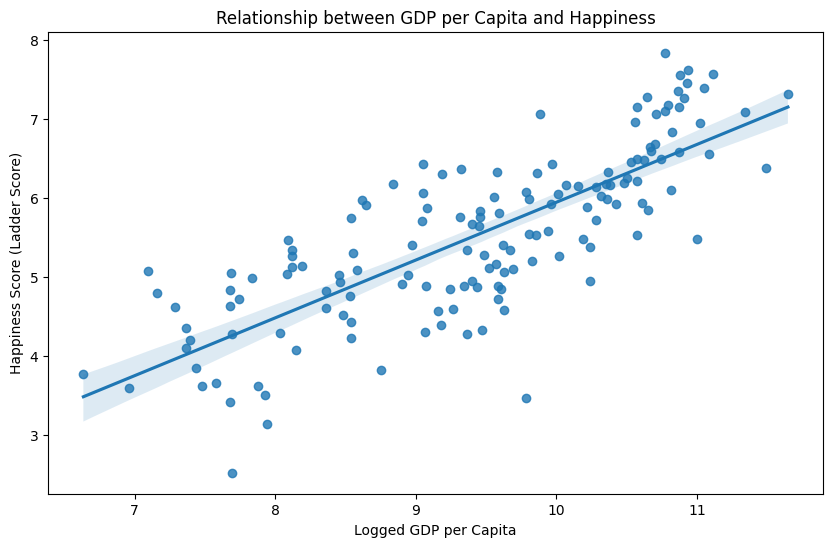

In [15]:
# Let's create a scatter plot to better visualize our data
plt.figure(figsize=(10, 6))
sns.regplot(x='Logged GDP per capita', y='Ladder score', data=df)
plt.title('Relationship between GDP per Capita and Happiness')
plt.xlabel('Logged GDP per Capita')
plt.ylabel('Happiness Score (Ladder Score)')

As we can see in the graph, GDP per capita impacts a lot on a country's happiness. Let's try to see if there is a country with low GDP per capita that is happier than any rich country though.

In [16]:
low_gdp_threshold = df['Logged GDP per capita'].quantile(0.25)
high_gpd_threshold = df['Logged GDP per capita'].quantile(0.75)

In [17]:
low_gdp_countries = df[df['Logged GDP per capita'] <= low_gdp_threshold]
high_gdp_countries = df[df['Logged GDP per capita'] >= high_gpd_threshold]

In [18]:
happiest_low_gdp_country = low_gdp_countries.loc[low_gdp_countries['Ladder score'].idxmax()]
least_happy_high_gdp_country = high_gdp_countries.loc[high_gdp_countries['Ladder score'].idxmin()]

In [19]:
happiest_low_gdp_country

Country name                                              Kyrgyzstan
Regional indicator                Commonwealth of Independent States
Ladder score                                                   5.744
Standard error of ladder score                                 0.046
Logged GDP per capita                                          8.538
Social support                                                 0.893
Healthy life expectancy                                       64.401
Freedom to make life choices                                   0.935
Generosity                                                     0.119
Perceptions of corruption                                      0.908
Dystopia + residual                                            2.648
Name: 66, dtype: object

In [20]:
least_happy_high_gdp_country

Country name                      Hong Kong S.A.R. of China
Regional indicator                                East Asia
Ladder score                                          5.477
Standard error of ladder score                        0.049
Logged GDP per capita                                  11.0
Social support                                        0.836
Healthy life expectancy                               76.82
Freedom to make life choices                          0.717
Generosity                                            0.067
Perceptions of corruption                             0.403
Dystopia + residual                                   1.236
Name: 76, dtype: object

Kyrgzstan is happier than Hong Kong despite having less social support, being more corrupted and being poorer. Poor countries can still be happier than rich countries.

## Happiness based on regions in the world

In [21]:
# Let's group the data by region and order them by ladder score
regional_happiness = df.groupby('Regional indicator')['Ladder score'].mean().sort_values(ascending=False)

In [22]:
regional_happiness

Regional indicator
North America and ANZ                 7.128500
Western Europe                        6.914905
Central and Eastern Europe            5.984765
Latin America and Caribbean           5.908050
East Asia                             5.810333
Commonwealth of Independent States    5.467000
Southeast Asia                        5.407556
Middle East and North Africa          5.219765
Sub-Saharan Africa                    4.494472
South Asia                            4.441857
Name: Ladder score, dtype: float64

C:\Users\Ezechiele\AppData\Local\Temp\ipykernel_16824\4059717295.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regional_happiness, y=regional_happiness.index, palette='viridis')


Text(0, 0.5, 'Region')

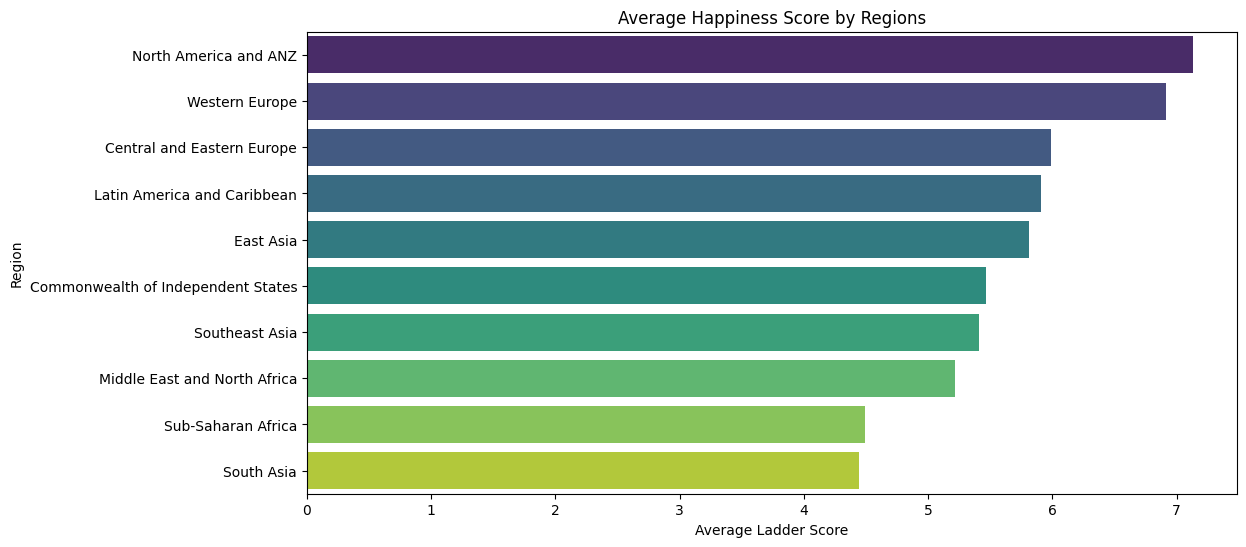

In [23]:
# Great, but our data isn't quite readable right now. Let's create a chart to improve visualization.
plt.figure(figsize=(12, 6))
sns.barplot(x=regional_happiness, y=regional_happiness.index, palette='viridis')
plt.title('Average Happiness Score by Regions')
plt.xlabel('Average Ladder Score')
plt.ylabel('Region')

There's a common perception that happiness in richer countries is harder to find due to the rising mental health issues that these countries' citizen face each year. Apparently, our data suggests that richer countries are STILL happier than poorer countries. This chart suggests that mental health awareness is simply more diffused in richer countries since citizens are more educated overall. To further prove our point let's create another chart that displays average Logged GDP per Capita by Region.

In [24]:
# Let's group the data by region and order them by GDP per capita
regional_gdp_per_capita = df.groupby('Regional indicator')['Logged GDP per capita'].mean().sort_values(ascending=False)

C:\Users\Ezechiele\AppData\Local\Temp\ipykernel_16824\3882238457.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regional_gdp_per_capita.values, y=regional_gdp_per_capita.index, palette='viridis')


Text(0, 0.5, 'World Region')

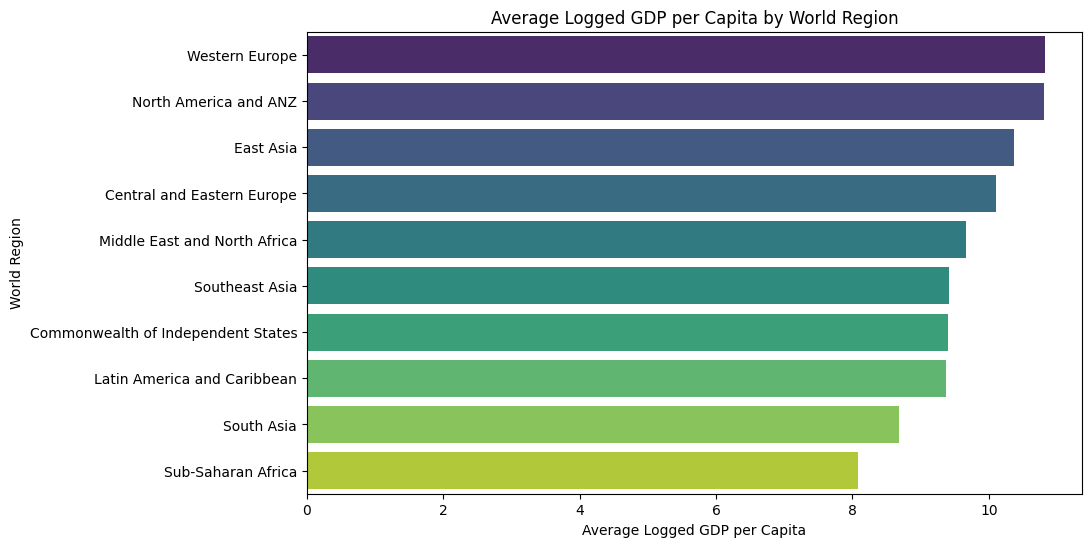

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x=regional_gdp_per_capita.values, y=regional_gdp_per_capita.index, palette='viridis')
plt.title('Average Logged GDP per Capita by World Region')
plt.xlabel('Average Logged GDP per Capita')
plt.ylabel('World Region')

**Western Europe, North America and New Zealand** still have the first places in the ladder. But we have another interesting thing here: some countries that have higher GDP per Capita are still less happy than countries with lower GDP per Capita. (**Eastern Europe** was third in the happiness rank despite having lower GDP per Capita than **East Asia**.). **Latin America** is a great example: despite being 8th in this ladder, it is the 4th region in the happiness by region ladder.

## Correlation matrix

In [26]:
# Enough with the comparisons, let's create a correlation matrix to see the correlations between the variables in our dataframe
temp_df = df.drop(['Country name', 'Regional indicator'], axis=1)
corr_matrix = temp_df.corr()
corr_matrix

,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
Ladder score,1.000000,-0.470787,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140,0.492010
Standard error of ladder score,-0.470787,1.000000,-0.645799,-0.530815,-0.583805,-0.275182,0.138349,0.276997,0.136827
Logged GDP per capita,0.789760,-0.645799,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337,-0.041119
Social support,0.756888,-0.530815,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207,0.006681
Healthy life expectancy,0.768099,-0.583805,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374,-0.023433
Freedom to make life choices,0.607753,-0.275182,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363,0.100242
Generosity,-0.017799,0.138349,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962,-0.027212
Perceptions of corruption,-0.421140,0.276997,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000,0.004478
Dystopia + residual,0.492010,0.136827,-0.041119,0.006681,-0.023433,0.100242,-0.027212,0.004478,1.000000


<Axes: >

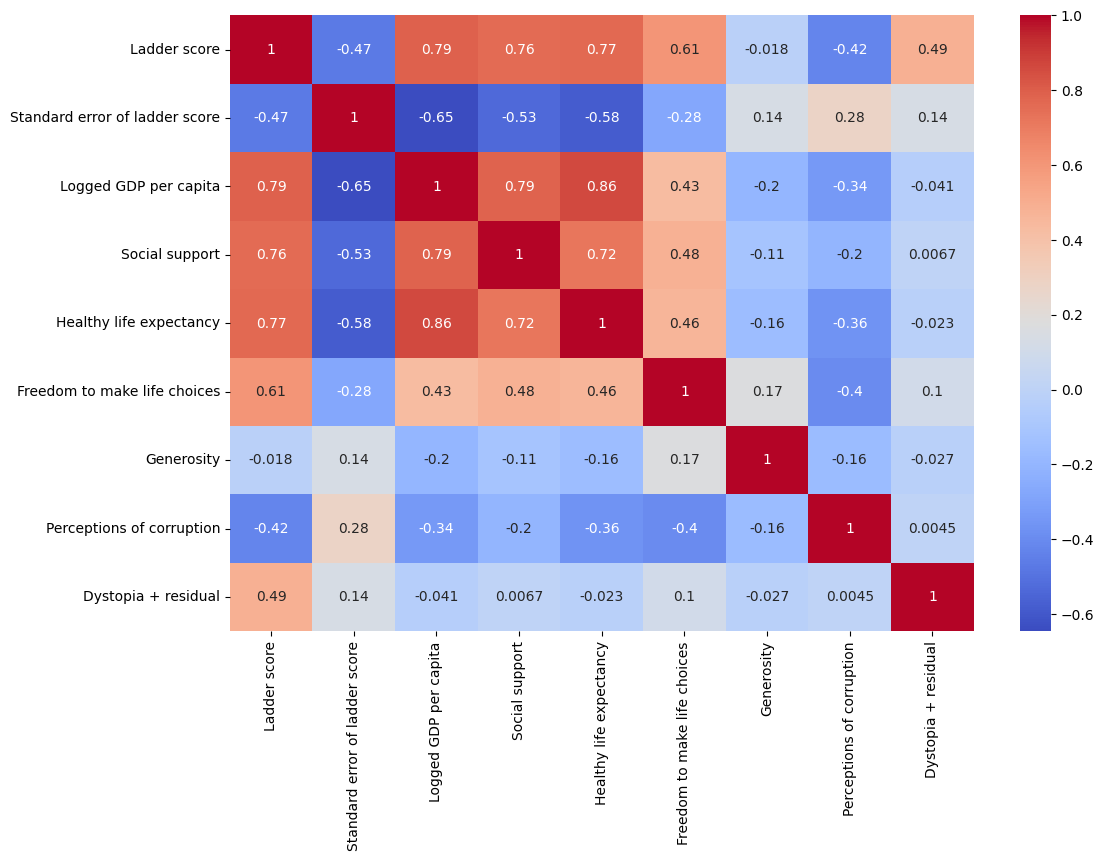

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

Factors like **Logged GDP per capita**, **social support**, and **healthy life expectancy** exhibit a strong positive correlation with the Ladder score, highlighting their significant influence on national happiness levels. A **higher GDP per capita** typically reflects better economic conditions, which can contribute to overall well-being. Similarly, **strong social support networks** and **longer, healthier lifespans** are crucial components of a nation's **happiness**.

**Perception of corruption** has a negative correlation with the ladder score, thus meaning that this variable also contributes to a happier country, but not as much as the ones we have cited before.

**Freedom to make life choices** is also a significant correlation: democratic countries make their citizens overall happier. This signals the importance of personal autonomy and civil liberties in achieving happiness.

The main notions that we get from this correlation matrix is that countries are happier if they have a **high GDP per capita, good social support, and a long healthy life expectancy**. These are the main variables that make a country happy or not.

## Linear Model

We'll train a linear regression model using the variables from above, and Ladder score as the target variable. We'll see if our considerations actually reflect the model's predictions.

In [33]:
# Let's import LinearRegression class from sklearn to handle the training on a high level
from sklearn.linear_model import LinearRegression

In [59]:
X = df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Perceptions of corruption', 'Freedom to make life choices']]  # Independent variables
y = df['Ladder score']  # Dependent variable

In [60]:
# We instantiate the LinearRegression object from sklearn
reg = LinearRegression()
# This method trains this linear regression model on our data.
reg.fit(X, y)

LinearRegression()

In [61]:
# Our model achieved an R-squared value of 0.75. 75% of the variability in the happiness scores among countries can be explained by variations in our selected predictors.
# 0.75 is a decent score.
reg.score(X, y)

0.75363454970928

In [62]:
# reg.predict() makes predictions on our data X.
predictions = reg.predict(X)

In [64]:
# Let's create a new dataframe that contains our predicted scores.
lin_df = df
lin_df['Predicted Happiness Score'] = predictions
lin_df

,Country name,Regional indicator,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Predicted Happiness Score
0,Finland,Western Europe,7.842,0.032,10.775,0.954,72.000,0.949,-0.098,0.186,3.253,7.139411
1,Denmark,Western Europe,7.620,0.035,10.933,0.954,72.700,0.946,0.030,0.179,2.868,7.199953
2,Switzerland,Western Europe,7.571,0.036,11.117,0.942,74.400,0.919,0.025,0.292,2.839,7.135325
3,Iceland,Western Europe,7.554,0.059,10.878,0.983,73.000,0.955,0.160,0.673,2.967,6.956248
4,Netherlands,Western Europe,7.464,0.027,10.932,0.942,72.400,0.913,0.175,0.338,2.798,6.984245
...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,7.926,0.787,48.700,0.715,-0.131,0.915,1.800,4.298649
145,Botswana,Sub-Saharan Africa,3.467,0.074,9.782,0.784,59.269,0.824,-0.246,0.801,0.648,5.400034
146,Rwanda,Sub-Saharan Africa,3.415,0.068,7.676,0.552,61.400,0.897,0.061,0.167,1.095,4.904131
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,7.943,0.750,56.201,0.677,-0.047,0.821,1.205,4.412373


Our model can predict pretty decently the scores of each country. Let's visualize the dataframe with the predictions to help us understand better.

In [78]:
# As a sample, we will use 10 random countries from our dataset.
sample_countries = lin_df.sample(10)

In [75]:
# Let's create a chart where we compare real happiness score to predicted happiness score.
plt.figure(figsize=(12, 6))
indices = np.arange(len(sample_countries))

<Figure size 1200x600 with 0 Axes>

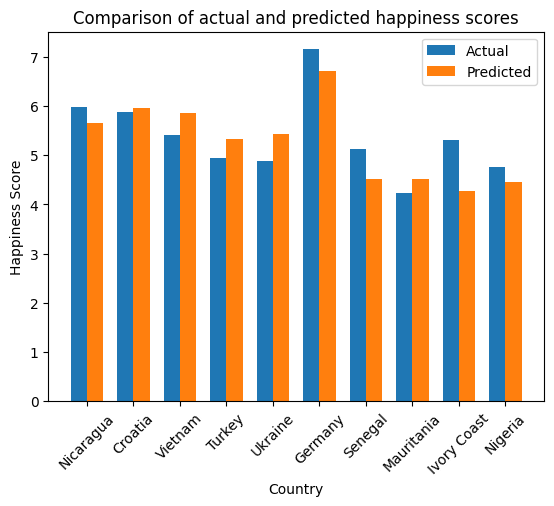

In [79]:
plt.bar(indices - 0.35/2, sample_countries['Ladder score'], 0.35, label='Actual')
plt.bar(indices + 0.35/2, sample_countries['Predicted Happiness Score'], 0.35, label='Predicted')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Comparison of actual and predicted happiness scores')
plt.xticks(indices, sample_countries['Country name'], rotation=45)
plt.legend()

Our model's predictions are pretty near to the real scores. We can deduct that **GDP per capita, Social support, Healthy life expectancy, Perceptions of corruption, Freedom to make life choices** make about **75%** of a country's happiness.

While our model explains a significant portion of the variance in happiness scores, there's still a 25% variance our model can't explain. We could attribute the remaining variables to cultural aspects, environmental conditions (such as country that have more sunlight), or other socio-political factors.